<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ?
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [751]:
import pandas as pd#Importation de la librairie Pandas
import matplotlib.pyplot as plt #création de stats et visualisation interactive.
import matplotlib.ticker as ticker #contrôle des étiquettes et des axes dans les plots.

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [752]:
#Importation du fichier population.csv
population = pd.read_csv('population.csv')

#Importation du fichier dispo_alimentaire.csv
dispoAlimentaire = pd.read_csv('dispo_alimentaire.csv')

#Importation du fichier aide_alimentaire.csv
aideAlimentaire = pd.read_csv('aide_alimentaire.csv')

#Importation du fichier sous_nutrition.csv
sousNutrition = pd.read_csv('sous_nutrition.csv')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [753]:
#Afficher les dimensions du dataset

print("Le tableau population comporte {} observation(s) ou article(s)".format(population.shape[0]))#0 donne les lignes
print("Le tableau population comporte {} colonne(s)".format(population.shape[1]))#1 donne les colonnes

Le tableau population comporte 1416 observation(s) ou article(s)
Le tableau population comporte 3 colonne(s)


In [754]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonnes".format(len(population.columns)))
print("------------------------------------------------------------")
#Le nombre de valeurs présentes dans chacune des colonnes
for colonne in population.columns:
    value_sum = population[colonne].count()
    print(f"Somme des valeurs dans la colonne '{colonne}': {value_sum}")

print("------------------------------------------------------------")
#La nature des données dans chacune des colonnes
population.dtypes

Le tableau comporte 3 colonnes
------------------------------------------------------------
Somme des valeurs dans la colonne 'Zone': 1416
Somme des valeurs dans la colonne 'Année': 1416
Somme des valeurs dans la colonne 'Valeur': 1416
------------------------------------------------------------


Zone       object
Année       int64
Valeur    float64
dtype: object

In [755]:
#Affichage les 5 premières lignes de la table

population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.59
1,Afghanistan,2014,33370.79
2,Afghanistan,2015,34413.60
3,Afghanistan,2016,35383.03
4,Afghanistan,2017,36296.11


In [756]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000

population['Valeur']=population['Valeur'].multiply(1000)

In [757]:
#changement du nom de la colonne Valeur par Population

population = population.rename(columns={'Valeur':'Population'})

In [758]:
#Affichage les 5 premières lignes de la table pour voir les modifications

population.head()

,Zone,Année,Population
0,Afghanistan,2013,32269589.00
1,Afghanistan,2014,33370794.00
2,Afghanistan,2015,34413603.00
3,Afghanistan,2016,35383032.00
4,Afghanistan,2017,36296113.00


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [759]:
#Afficher les dimensions du dataset

print("Le tableau dispoAlimentaire comporte {} observations ou articles et {} colonnes".format(dispoAlimentaire.shape[0], dispoAlimentaire.shape[1]))

Le tableau dispoAlimentaire comporte 15605 observations ou articles et 18 colonnes


In [760]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonnes".format(len(dispoAlimentaire.columns)))

Le tableau comporte 18 colonnes


In [761]:
#Affichage les 5 premières lignes de la table
dispoAlimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.00,1.72,0.20,0.77,53.00,NaN,NaN,53.00,NaN,53.00,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.00,1.29,0.01,0.02,41.00,2.00,40.00,39.00,2.00,3.00,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.00,0.06,0.01,0.03,2.00,NaN,2.00,2.00,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.00,0.00,NaN,NaN,0.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.00,2.70,0.02,0.05,82.00,NaN,82.00,82.00,NaN,NaN,NaN,NaN,NaN


In [762]:
#remplacement des NaN dans le dataset par des 0
dispoAlimentaire.fillna(0, inplace=True)

In [763]:
#imprimons les colonnes avec des valeurs numériques
num_col = dispoAlimentaire.select_dtypes(include=['int', 'float']).columns
col_ordo =",".join(["'"+col+"'" for col in num_col])
print(col_ordo)
#dans la suite j'ai enlevé les colonnes n'ayant pas besoin d'être convertie comme : 'Disponibilité alimentaire (Kcal/personne/jour)' par exemple

'Aliments pour animaux','Autres Utilisations','Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité alimentaire en quantité (kg/personne/an)','Disponibilité de matière grasse en quantité (g/personne/jour)','Disponibilité de protéines en quantité (g/personne/jour)','Disponibilité intérieure','Exportations - Quantité','Importations - Quantité','Nourriture','Pertes','Production','Semences','Traitement','Variation de stock'


In [764]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
col_convert=['Aliments pour animaux','Autres Utilisations','Disponibilité intérieure','Exportations - Quantité','Importations - Quantité',
             'Nourriture','Pertes','Production','Semences','Traitement','Variation de stock']
for i in col_convert:
    if dispoAlimentaire[i].dtype in ['int64','float64']:
        dispoAlimentaire[i]*=1000000

In [765]:
#Affichage les 5 premières lignes de la table
pd.set_option('display.float_format', '{:.2f}'.format)
dispoAlimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.00,0.00,5.00,1.72,0.20,0.77,53000000.00,0.00,0.00,53000000.00,0.00,53000000.00,0.00,0.00,0.00
1,Afghanistan,"Agrumes, Autres",vegetale,0.00,0.00,1.00,1.29,0.01,0.02,41000000.00,2000000.00,40000000.00,39000000.00,2000000.00,3000000.00,0.00,0.00,0.00
2,Afghanistan,Aliments pour enfants,vegetale,0.00,0.00,1.00,0.06,0.01,0.03,2000000.00,0.00,2000000.00,2000000.00,0.00,0.00,0.00,0.00,0.00
3,Afghanistan,Ananas,vegetale,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,Afghanistan,Bananes,vegetale,0.00,0.00,4.00,2.70,0.02,0.05,82000000.00,0.00,82000000.00,82000000.00,0.00,0.00,0.00,0.00,0.00


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [766]:
#Afficher les dimensions du dataset

print("Le tableau aideAlimentaire comporte {} observations ou articles et {} colonnes".format(aideAlimentaire.shape[0], (aideAlimentaire.shape[1])))

Le tableau aideAlimentaire comporte 1475 observations ou articles et 4 colonnes


In [767]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonnes".format(len(aideAlimentaire.columns)))

Le tableau comporte 4 colonnes


In [768]:
#Affichage les 5 premières lignes de la table
aideAlimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [769]:
#changement du nom de la colonne Pays bénéficiaire par Zone

aideAlimentaire = aideAlimentaire.rename(columns={'Pays bénéficiaire':'Zone'})

In [770]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg

aideAlimentaire['Valeur']=aideAlimentaire['Valeur'].multiply(1000)

In [771]:
#Affichage les 5 premières lignes de la table
aideAlimentaire.head()

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [772]:
#Afficher les dimensions du dataset

print("Le tableau aideAlimentaire comporte {} observations ou articles et {} colonnes".format(sousNutrition.shape[0],(sousNutrition.shape[1])))

Le tableau aideAlimentaire comporte 1218 observations ou articles et 3 colonnes


In [773]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonnes".format(len(sousNutrition.columns)))

Le tableau comporte 3 colonnes


In [774]:
#Afficher les 5 premières lignes de la table
sousNutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [775]:
#Conversion de la colonne sous nutrition en numérique
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
sousNutrition['Valeur'] = pd.to_numeric(sousNutrition['Valeur'], errors='coerce') #coerce (contraint) transforme les valeurs inférieur à 0.1 en NaN.
print(sousNutrition.dtypes)

Zone       object
Année      object
Valeur    float64
dtype: object


In [776]:
#Puis remplacement des NaN en 0
sousNutrition.fillna(0, inplace=True)
sousNutrition.sort_values('Valeur').head(1)

,Zone,Année,Valeur
608,Lettonie,2014-2016,0.00


In [777]:
#changement du nom de la colonne Valeur par sous_nutrition
sousNutrition = sousNutrition.rename(columns={'Valeur':'sous_nutrition'})

In [778]:
#Multiplication de la colonne sous_nutrition par 1000000
sousNutrition['sous_nutrition']=sousNutrition['sous_nutrition'].multiply(1000000)

In [779]:
#Afficher les 5 premières lignes de la table
sousNutrition.head()

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000.00
1,Afghanistan,2013-2015,8800000.00
2,Afghanistan,2014-2016,8900000.00
3,Afghanistan,2015-2017,9700000.00
4,Afghanistan,2016-2018,10500000.00


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [780]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017
df = pd.merge(population, sousNutrition, on='Zone', how='inner')
df = df[df['Année_x'] == 2017]

In [781]:
#pour cibler l'année 2017 dans la colonne des années en sous nutrition
#j'ai d'abord établis quelles étaient les valeurs présente dans la dite colonne
dist_any = df['Année_y'].unique()
dist_any

array(['2012-2014', '2013-2015', '2014-2016', '2015-2017', '2016-2018',
       '2017-2019'], dtype=object)

In [782]:
#Affichage du dataset

df = df[df['Année_y'].isin(['2016-2018'])]#avec '.isin' on filtre les valeurs.
df = df.rename(columns={'Année_x':'Année pop'})
df = df.rename(columns={'Année_y':'Années ss nut'})
df.head()

,Zone,Année pop,Population,Années ss nut,sous_nutrition
28,Afghanistan,2017,36296113.00,2016-2018,10500000.00
64,Afrique du Sud,2017,57009756.00,2016-2018,3100000.00
100,Albanie,2017,2884169.00,2016-2018,100000.00
136,Algérie,2017,41389189.00,2016-2018,1300000.00
172,Allemagne,2017,82658409.00,2016-2018,0.00


In [783]:
#Calcul et affichage du nombre de personnes en état de sous nutrition
tt_sousNutrition = df['sous_nutrition'].sum()
tt_pop=df['Population'].sum()
print("En 2017. Il y avait {:.0f} personnes en sous nutrition dans le monde.".format(tt_sousNutrition),
      "Ce qui représente {:.4f} % de la population mondiale.".format((tt_sousNutrition/tt_pop)*100))


En 2017. Il y avait 535700000 personnes en sous nutrition dans le monde. Ce qui représente 7.1012 % de la population mondiale.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [784]:
#Combien mange en moyenne un être humain ?
"Un être humain doit consommer environ 2200 kilo calories par jour ---> https://www.who.int/fr/news-room/fact-sheets/detail/healthy-diet"

'Un être humain doit consommer environ 2200 kilo calories par jour ---> https://www.who.int/fr/news-room/fact-sheets/detail/healthy-diet'

In [785]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
dfDispo = pd.merge(dispoAlimentaire, population, on='Zone', how='inner')

In [786]:
#Affichage du nouveau dataframe
dfDispo.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population
0,Afghanistan,Abats Comestible,animale,0.00,0.00,5.00,1.72,0.20,0.77,53000000.00,0.00,0.00,53000000.00,0.00,53000000.00,0.00,0.00,0.00,2013,32269589.00
1,Afghanistan,Abats Comestible,animale,0.00,0.00,5.00,1.72,0.20,0.77,53000000.00,0.00,0.00,53000000.00,0.00,53000000.00,0.00,0.00,0.00,2014,33370794.00
2,Afghanistan,Abats Comestible,animale,0.00,0.00,5.00,1.72,0.20,0.77,53000000.00,0.00,0.00,53000000.00,0.00,53000000.00,0.00,0.00,0.00,2015,34413603.00
3,Afghanistan,Abats Comestible,animale,0.00,0.00,5.00,1.72,0.20,0.77,53000000.00,0.00,0.00,53000000.00,0.00,53000000.00,0.00,0.00,0.00,2016,35383032.00
4,Afghanistan,Abats Comestible,animale,0.00,0.00,5.00,1.72,0.20,0.77,53000000.00,0.00,0.00,53000000.00,0.00,53000000.00,0.00,0.00,0.00,2017,36296113.00


In [787]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement
dfDispo=dfDispo.loc[dfDispo['Année']==2017].copy() #filtrage sur 2017
dfDispo['dispo_kcal'] = dfDispo['Disponibilité alimentaire (Kcal/personne/jour)'].sum()

pd.set_option('display.float_format', '{:.2f}'.format)#pour ne pas afficher la notation scientifique.
dfDispo.head(2)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,dispo_kcal
4,Afghanistan,Abats Comestible,animale,0.00,0.00,5.00,1.72,0.20,0.77,53000000.00,...,0.00,53000000.00,0.00,53000000.00,0.00,0.00,0.00,2017,36296113.00,488762.00
10,Afghanistan,"Agrumes, Autres",vegetale,0.00,0.00,1.00,1.29,0.01,0.02,41000000.00,...,40000000.00,39000000.00,2000000.00,3000000.00,0.00,0.00,0.00,2017,36296113.00,488762.00


In [788]:
#Calcul du nombre d'humains pouvant être nourris

ttPopulation=(dfDispo['Population'].unique().sum()) #Calcul de la population totale

ckal_per_zone=dfDispo['Disponibilité alimentaire (Kcal/personne/jour)']*dfDispo['Population']#multiplication de disponibilité alimentaire par pays, par la population par pays.

kcal_tt=ckal_per_zone.sum()#La somme des résultats par pays donnant le résultat mondial.

result=((kcal_tt/2200)/ttPopulation)*100
#le résultat est ensuite divisé par le nombre de kilocalories nécéssaire puis par la pop.mondiale et enfin multiplié par 100 pour avoir un résultat en %.

print("La proportion d'humains pouvant être nourris est :","{:.2f}".format(result),
      "%. C'est à dire {:.0f} personnes".format(kcal_tt/2200))

La proportion d'humains pouvant être nourris est : 130.40 %. C'est à dire 9508629376 personnes


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [789]:
#Transfert des données avec les végétaux dans un nouveau dataframe

plante = dfDispo.loc[dfDispo['Origine']=="vegetale"].copy()#filtrage pour n'avoir que les données avec une origine végétale.


In [790]:
#Calcul du nombre de kcal disponible pour les végétaux
plante_ckal= plante['Disponibilité alimentaire (Kcal/personne/jour)']*plante['Population']
planteckal_tt=plante_ckal.sum()


# Imprimer les valeurs uniques sans les crochets
print("nombre de kcal disponible pour les végétaux :", planteckal_tt)

nombre de kcal disponible pour les végétaux : 17260764211501.0


In [791]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux

ckal_per_zone=plante['Disponibilité alimentaire (Kcal/personne/jour)']*plante['Population']#multiplication de disponibilité alimentaire par pays, par la population par pays.

kcal_tt=ckal_per_zone.sum()#La somme des résultats par pays donnant le résultat mondial.

result=((kcal_tt/2200)/ttPopulation)*100#le résultat mondial est ensuite divisé par le nombre de kilocalories nécéssaire puis multiplié par 100 pour avoir un résultat en %.

print("La proportion d'humains pouvant être nourris avec des plantes est :","{:.2f}".format(result),
      "%. C'est à dire {:.0f} personnes".format(kcal_tt/2200))

La proportion d'humains pouvant être nourris avec des plantes est : 107.60 %. C'est à dire 7845801914 personnes


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [792]:
#Calcul de la disponibilité totale
dispo_tt = dfDispo['Disponibilité intérieure'].sum()
print("Somme totale de la disponibilité intérieure pour 2017 :",dispo_tt)

Somme totale de la disponibilité intérieure pour 2017 : 9733927000000.0


In [793]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures,

for elt in ['Pertes','Aliments pour animaux','Nourriture']:
    print("Proportion de", elt ,":","{:.2f}".format((dfDispo[elt].sum()/dispo_tt)*100),"%")
#elt : extract, load, transform

Proportion de Pertes : 4.65 %
Proportion de Aliments pour animaux : 13.23 %
Proportion de Nourriture : 49.37 %


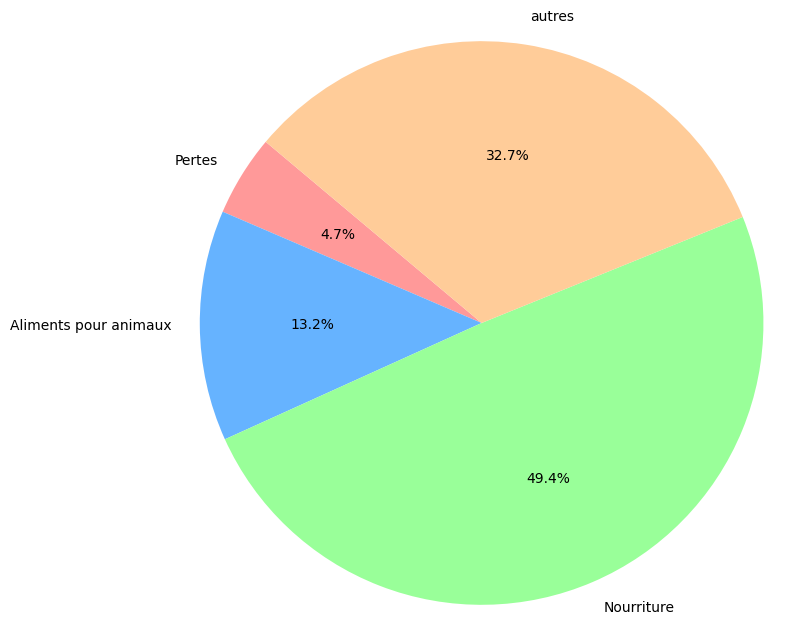

In [794]:
# création d'un diagramme en camembert pour la disponibilité intérieur

data = {'Catégorie': ['Pertes', "Aliments pour animaux", 'Nourriture',"autres"],
        'Valeurs': [4.65, 13.23, 49.37,100-4.65-13.23-49.37]}#vu qu'il y à peu de valeurs, je les aient juste recopiées.

dfpie = pd.DataFrame(data)
couleurs=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
# Création du pie plot
plt.figure(figsize=(8, 8))
plt.pie(dfpie['Valeurs'], labels=dfpie['Catégorie'], autopct='%1.1f%%', startangle=140,colors=couleurs)#autopct affiche le pourcentage des valeurs
plt.axis('equal')  # Assure que le pie plot est un cercle
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [795]:
#Création d'une liste avec toutes les variables

liste_variables = dfDispo.loc[dfDispo['Origine']=="vegetale",'Produit'].tolist()
#pour avoir une liste des céréales on cible déjà tout le groupe avec des produits d'origine végétale.

liste_variables=list(set(liste_variables))#on supprime les doublons.

for i, element in enumerate(liste_variables, 1):#on rend la liste plus lisible.
    print(f"{i}. {element}", end='  /  ' if i % 5 != 0 else '\n')# et on donne un numéro à chaque élément (ça facilite le tri).



1. Dattes  /  2. Piments  /  3. Haricots  /  4. Blé  /  5. Oranges, Mandarines
6. Edulcorants Autres  /  7. Huile de Colza&Moutarde  /  8. Huile de Germe de Maïs  /  9. Pamplemousse  /  10. Noix
11. Ananas  /  12. Olives  /  13. Citrons & Limes  /  14. Feve de Cacao  /  15. Légumes, Autres
16. Plantes Oleiferes, Autre  /  17. Riz (Eq Blanchi)  /  18. Sucre, canne  /  19. Vin  /  20. Bananes plantains
21. Girofles  /  22. Huile de Coco  /  23. Huile Graines de Coton  /  24. Épices, Autres  /  25. Fruits, Autres
26. Huile de Palme  /  27. Tomates  /  28. Arachides Decortiquees  /  29. Coco (Incl Coprah)  /  30. Sésame
31. Boissons Fermentés  /  32. Oignons  /  33. Céréales, Autres  /  34. Huile d'Olive  /  35. Pois
36. Légumineuses Autres  /  37. Avoine  /  38. Soja  /  39. Huile de Palmistes  /  40. Graines de tournesol
41. Bière  /  42. Café  /  43. Patates douces  /  44. Miel  /  45. Manioc
46. Raisin  /  47. Agrumes, Autres  /  48. Aliments pour enfants  /  49. Thé  /  50. Alcool, no

In [796]:
#puis enfin on sélectionne les éléments qui sont des céréales et on créé une liste.
liste_cereales=["riz (eq blanchi)","orge","blé","avoine","millet","céréales, autres","maïs","seigle","sorgho"]

In [797]:
#Création d'un dataframe avec les informations uniquement pour ces céréales

dfDispo['Produit'] = dfDispo['Produit'].str.lower()# pour ne pas prendre en compte la casse.
cereale = dfDispo.loc[dfDispo['Produit'].isin(liste_cereales),:]
cereale.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,dispo_kcal
46,Afghanistan,blé,vegetale,0.00,0.00,1369.00,160.23,4.69,36.91,5992000000.00,...,1173000000.00,4895000000.00,775000000.00,5169000000.00,322000000.00,0.00,-350000000.00,2017,36296113.00,488762.00
76,Afghanistan,"céréales, autres",vegetale,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2017,36296113.00,488762.00
196,Afghanistan,maïs,vegetale,200000000.00,0.00,21.00,2.50,0.30,0.56,313000000.00,...,1000000.00,76000000.00,31000000.00,312000000.00,5000000.00,0.00,0.00,2017,36296113.00,488762.00
208,Afghanistan,millet,vegetale,0.00,0.00,3.00,0.40,0.02,0.08,13000000.00,...,0.00,12000000.00,1000000.00,13000000.00,0.00,0.00,0.00,2017,36296113.00,488762.00
244,Afghanistan,orge,vegetale,360000000.00,0.00,26.00,2.92,0.24,0.79,524000000.00,...,10000000.00,89000000.00,52000000.00,514000000.00,22000000.00,0.00,0.00,2017,36296113.00,488762.00


In [798]:
#Affichage de la proportion d'alimentation animale par produits
cereale=cereale.groupby('Produit').sum().reset_index()
cereale['proportion_alimentation_animale'] = ((cereale['Aliments pour animaux'] / cereale['Disponibilité intérieure'])*100).round(2) #la proportion est en %.

cereale=cereale[['Produit','Aliments pour animaux','Disponibilité intérieure','Nourriture','Pertes','Production','proportion_alimentation_animale']]
cereale=cereale.sort_values(by='proportion_alimentation_animale',ascending=False)
print("Proportion d'alimentation animale par produit céréalié.")
cereale


Proportion d'alimentation animale par produit céréalié.


,Produit,Aliments pour animaux,Disponibilité intérieure,Nourriture,Pertes,Production,proportion_alimentation_animale
0,avoine,15865000000.00,22537000000.00,3459000000.00,508000000.00,22713000000.00,70.40
2,"céréales, autres",18782000000.00,27193000000.00,5308000000.00,780000000.00,28109000000.00,69.07
5,orge,88798000000.00,134152000000.00,6744000000.00,4571000000.00,133776000000.00,66.19
3,maïs,544746000000.00,953202000000.00,125000000000.00,40633000000.00,1016354000000.00,57.15
7,seigle,8073000000.00,16362000000.00,5349000000.00,555000000.00,16500000000.00,49.34
8,sorgho,24794000000.00,58223000000.00,24153000000.00,2746000000.00,62116000000.00,42.58
1,blé,121686000000.00,661667000000.00,450581000000.00,27259000000.00,691821000000.00,18.39
4,millet,3290000000.00,29894000000.00,23040000000.00,2276000000.00,28907000000.00,11.01
6,riz (eq blanchi),33581000000.00,475141000000.00,376830000000.00,27378000000.00,495447000000.00,7.07


In [799]:
#Proportion alimentation animale
proportion_alim_animale=(cereale['Aliments pour animaux'].sum()/cereale['Disponibilité intérieure'].sum())*100
proportion_alim_animale=proportion_alim_animale.round(2)
print("La proportion d'alimentation animale est de {} %".format(proportion_alim_animale) )

La proportion d'alimentation animale est de 36.14 %


In [800]:
#Proportion alimentation humaine
proportion_alimentation_humaine=(cereale['Nourriture'].sum()/cereale['Disponibilité intérieure'].sum())*100
proportion_alimentation_humaine=proportion_alimentation_humaine.round(2)
print("La proportion d'alimentation humaine est de {} %".format(proportion_alimentation_humaine) )

La proportion d'alimentation humaine est de 42.91 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [801]:
#Création de la colonne proportion par pays
proportion_sous_alimentee = df.groupby('Zone').sum().reset_index()#grouper les données par zone.
proportion_sous_alimentee['proportion_par_pays'] = (proportion_sous_alimentee['sous_nutrition'] / proportion_sous_alimentee['Population'])*100

In [802]:
#affichage après trie des 10 pires pays
top10=proportion_sous_alimentee.sort_values(by='proportion_par_pays',ascending=False).head(10)
top10.at[151, 'Zone'] = 'Corée du nord'#changer République Populaire de Corée en "Corée du Nord"
top10

,Zone,Année pop,Population,Années ss nut,sous_nutrition,proportion_par_pays
72,Haïti,2017,10982366.00,2016-2018,5300000.00,48.26
151,Corée du nord,2017,25429825.00,2016-2018,12000000.00,47.19
99,Madagascar,2017,25570512.00,2016-2018,10500000.00,41.06
95,Libéria,2017,4702226.00,2016-2018,1800000.00,38.28
91,Lesotho,2017,2091534.00,2016-2018,800000.00,38.25
174,Tchad,2017,15016753.00,2016-2018,5700000.00,37.96
143,Rwanda,2017,11980961.00,2016-2018,4200000.00,35.06
112,Mozambique,2017,28649018.00,2016-2018,9400000.00,32.81
177,Timor-Leste,2017,1243258.00,2016-2018,400000.00,32.17
0,Afghanistan,2017,36296113.00,2016-2018,10500000.00,28.93


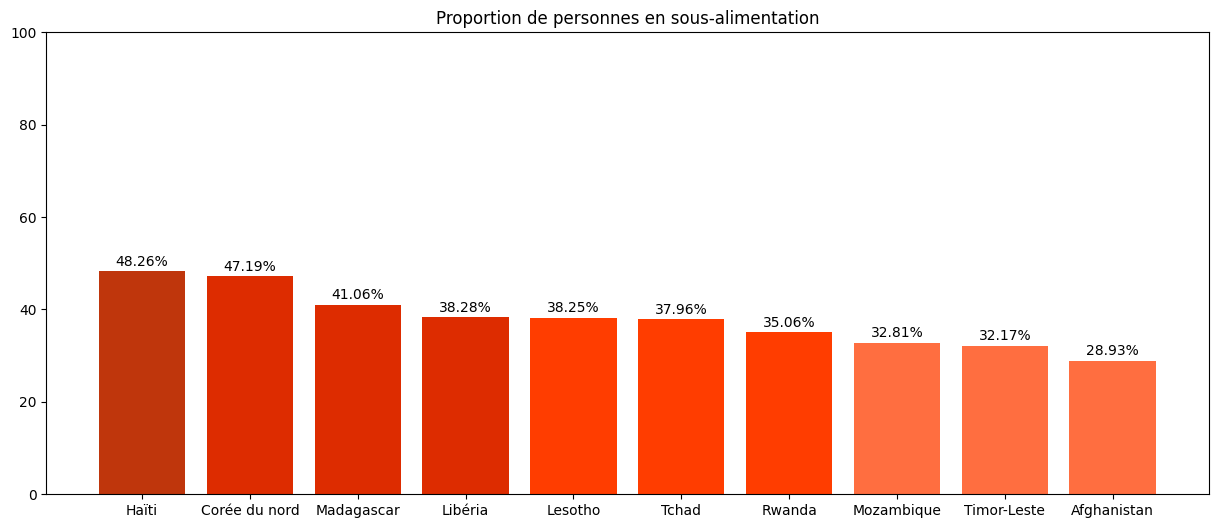

In [803]:
listeprop=top10['proportion_par_pays'].round(2).tolist()
listeprop=[f'{i}%' for i in listeprop]

plt.figure(figsize=(15, 6))
couleurs=['#bf360c', '#dd2c00', '#dd2c00', '#dd2c00','#ff3d00', '#ff3d00', '#ff3d00','#ff6e40', '#ff6e40', '#ff6e40']
barres=plt.bar(top10['Zone'], top10['proportion_par_pays'], color=couleurs)


plt.title('Proportion de personnes en sous-alimentation')


plt.ylim(0,100)

for bar, value in zip(barres, listeprop):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, value, ha='center', va='bottom')  # Offset ajusté à 0.5

plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [804]:
#calcul du total de l'aide alimentaire par pays
tt_aide = aideAlimentaire[['Zone','Valeur']].groupby('Zone').sum().reset_index()
top10=tt_aide.sort_values(by='Valeur', ascending=False).head(10)

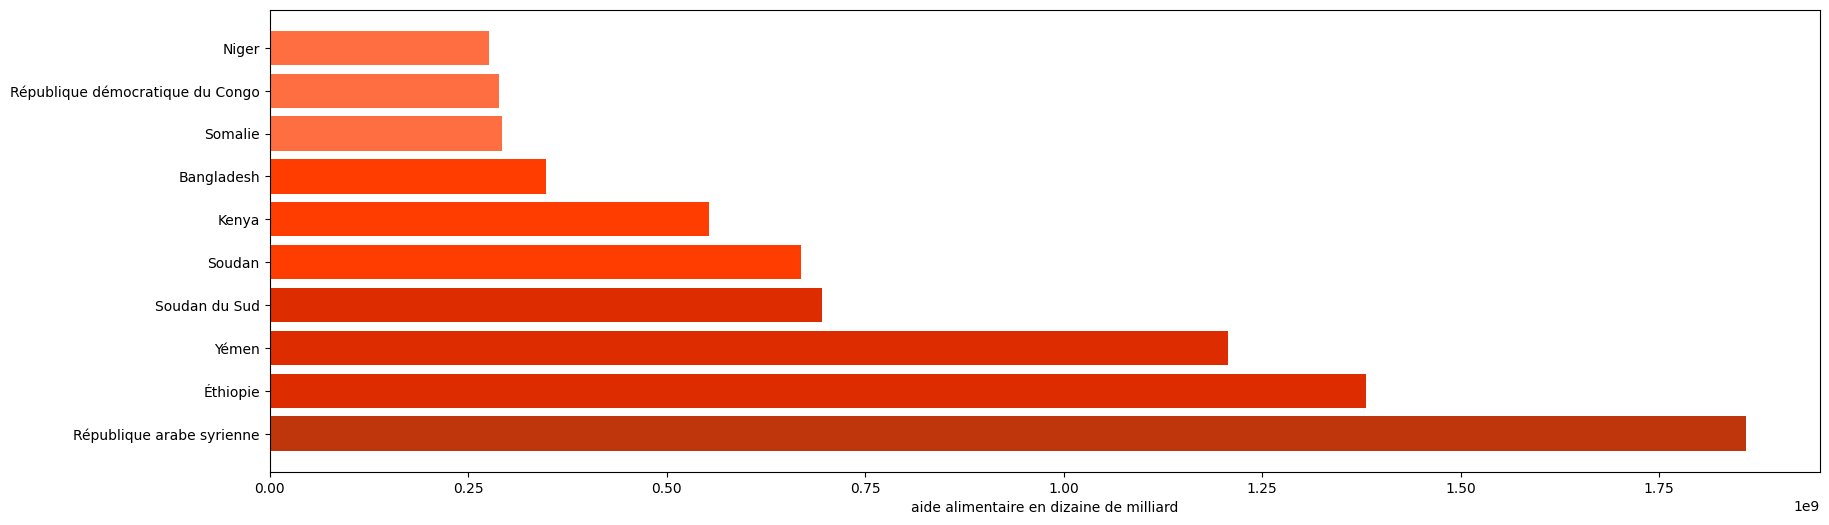

In [805]:

plt.figure(figsize=(20, 6))
couleurs=['#bf360c', '#dd2c00', '#dd2c00', '#dd2c00','#ff3d00', '#ff3d00', '#ff3d00','#ff6e40', '#ff6e40', '#ff6e40']
plt.barh(top10['Zone'], top10['Valeur'], color=couleurs)#barh affiche le diagramme de façon horizontale.


plt.xlabel('aide alimentaire en dizaine de milliard')

plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [806]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année

col_drop = ['Produit']
evolution_aide_alim = aideAlimentaire.drop(columns=col_drop)#on enlève la colonne produit pour faciliter la lecture
evolution_aide_alim = evolution_aide_alim.rename(columns={'Valeur':'aide_alimentaire'})

groupeby_annee=evolution_aide_alim.groupby(['Année','Zone']).sum().reset_index()
groupeby_annee=groupeby_annee.sort_values(by='aide_alimentaire',ascending=False)

groupeby_annee.head()


,Année,Zone,aide_alimentaire
121,2014,République arabe syrienne,651870000
71,2013,Éthiopie,591404000
141,2014,Éthiopie,586624000
47,2013,République arabe syrienne,563566000
183,2015,République arabe syrienne,524949000


In [807]:

#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire

groupeby_zone=evolution_aide_alim.groupby('Zone').sum().reset_index()
groupeby_zone=groupeby_zone.sort_values(by='aide_alimentaire',ascending=False)
groupeby_zone['Année']='2013-2016'

listetop5 = groupeby_zone['Zone'].head(5).tolist()

print("5 pays qui ont le plus bénéficié de l'aide alimentaire :", ', '.join(listetop5))

5 pays qui ont le plus bénéficié de l'aide alimentaire : République arabe syrienne, Éthiopie, Yémen, Soudan du Sud, Soudan


In [808]:
#On filtre sur le dataframe avec notre liste
groupeby_zonefiltre=groupeby_zone[groupeby_zone['Zone'].isin(listetop5)]
groupeby_zonefiltre

,Zone,Année,aide_alimentaire
50,République arabe syrienne,2013-2016,1858943000
75,Éthiopie,2013-2016,1381294000
70,Yémen,2013-2016,1206484000
61,Soudan du Sud,2013-2016,695248000
60,Soudan,2013-2016,669784000


In [809]:

# Affichage des pays avec l'aide alimentaire par année 5 pays qui en ont le plus bénéficiées

groupeby_annee=groupeby_annee[groupeby_annee['Zone'].isin(listetop5)]
groupeby_annee=groupeby_annee.sort_values(by=["Zone","Année"],ascending=True)
groupeby_annee

,Année,Zone,aide_alimentaire
47,2013,République arabe syrienne,563566000
121,2014,République arabe syrienne,651870000
183,2015,République arabe syrienne,524949000
222,2016,République arabe syrienne,118558000
57,2013,Soudan,330230000
131,2014,Soudan,321904000
192,2015,Soudan,17650000
58,2013,Soudan du Sud,196330000
132,2014,Soudan du Sud,450610000
193,2015,Soudan du Sud,48308000


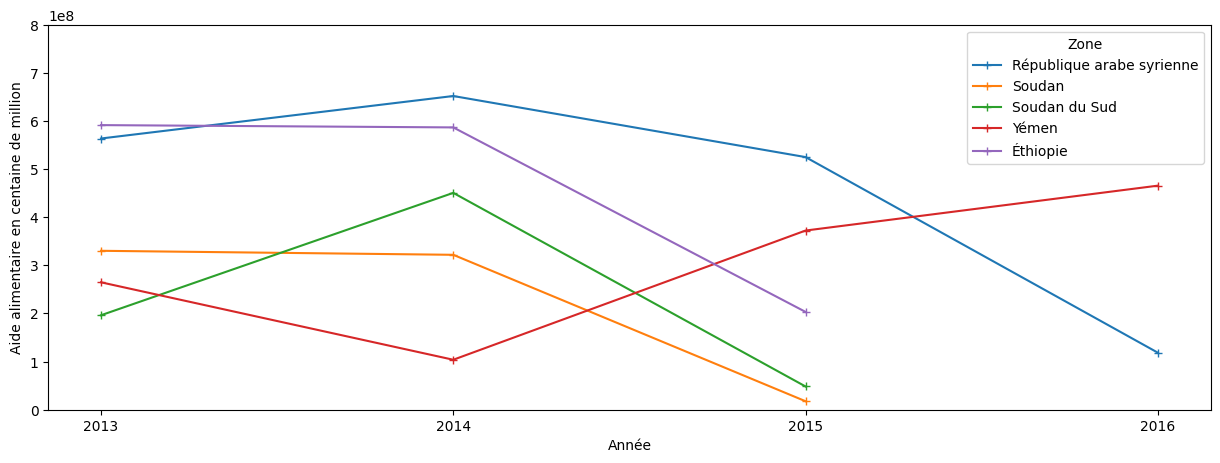

In [823]:


# avoir les années en index et les pays en colonnes
plottop5 = groupeby_annee.pivot(index='Année', columns='Zone', values='aide_alimentaire')


fig, ax = plt.subplots(figsize=(15, 5))


plottop5.plot(marker='+',ax=ax)




plt.xlabel("Année")
plt.ylabel("Aide alimentaire en centaine de million")

ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))#pour empècher que l'axe n'affiche pas les années en floats ex : 2013.5
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))#pour ne pas avoir de répétition de l'année dans l'axe
plt.ylim(0,800000000)#pour avoir un peu d'espace vide au dessus des lignes et rendre le tout plus lisible.

plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [811]:
#Calcul de la disponibilité en kcal par personne par jour par pays
dispo_kcal_per_person=dfDispo

sommekcal=dispo_kcal_per_person[['Zone','Disponibilité alimentaire (Kcal/personne/jour)']].groupby('Zone').sum()


#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne
sommekcal.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)',ascending=True).head(10)




,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
République centrafricaine,1879.00
Zambie,1924.00
Madagascar,2056.00
Afghanistan,2087.00
Haïti,2089.00
République populaire démocratique de Corée,2093.00
Tchad,2109.00
Zimbabwe,2113.00
Ouganda,2126.00


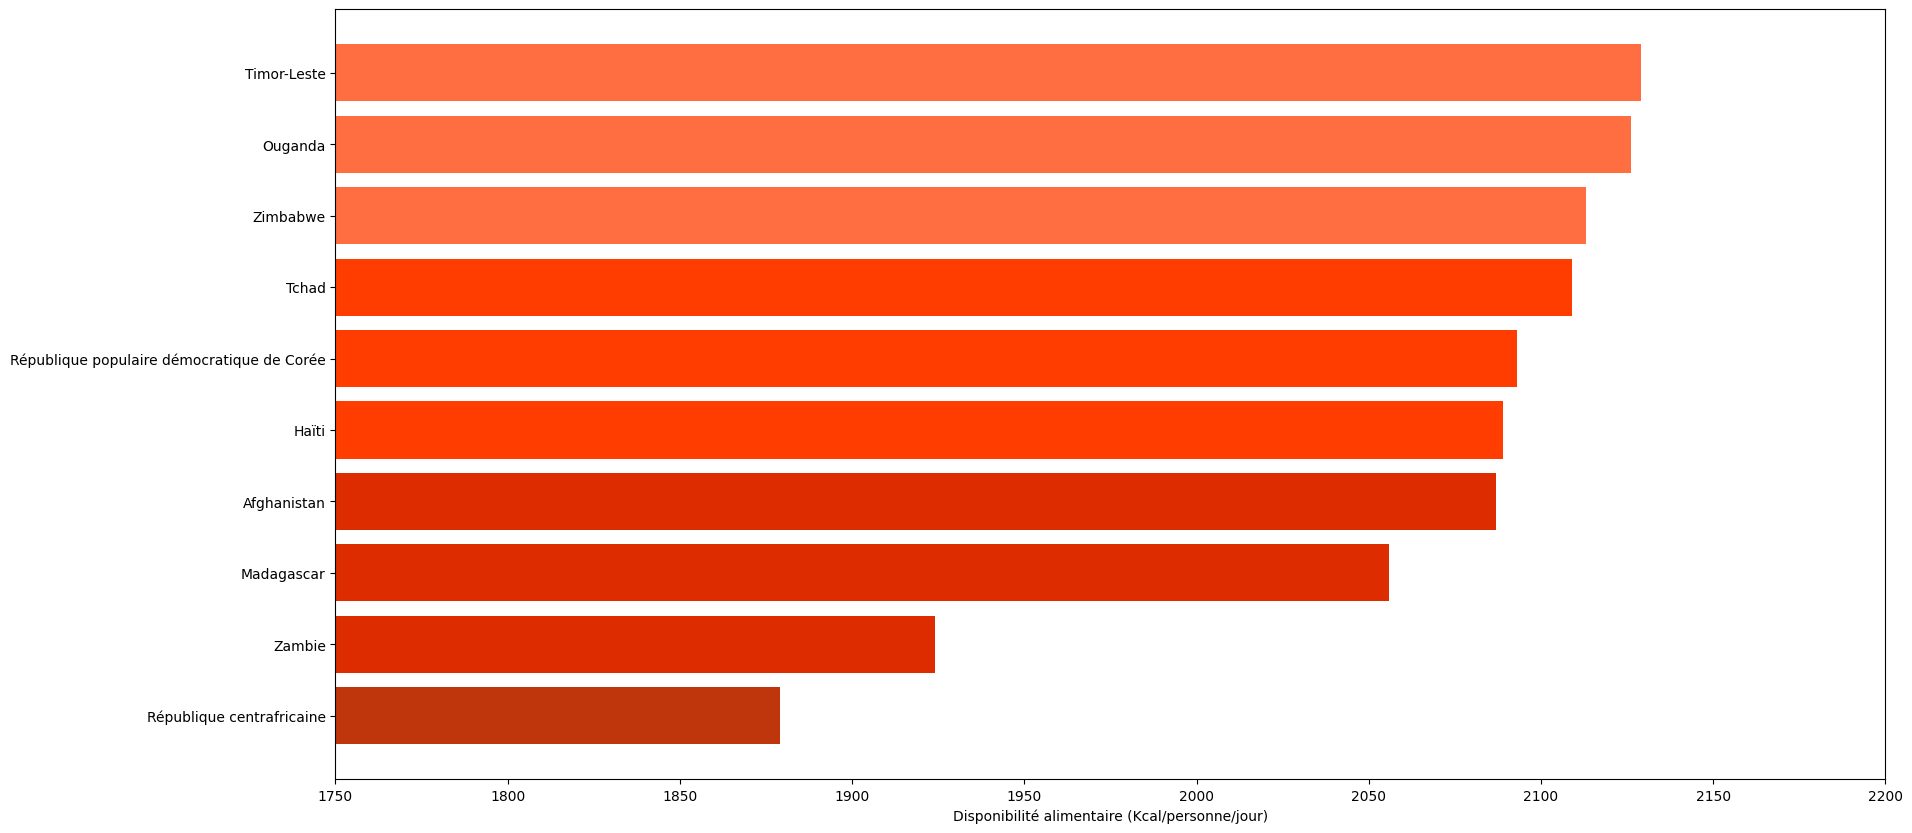

In [812]:
top10_pire=sommekcal.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)',ascending=True).head(10)
top10_pire=top10_pire.reset_index()

plt.figure(figsize=(20, 10))
couleurs=['#bf360c', '#dd2c00', '#dd2c00', '#dd2c00','#ff3d00', '#ff3d00', '#ff3d00','#ff6e40', '#ff6e40', '#ff6e40']


bars = plt.barh( top10_pire['Zone'],top10_pire['Disponibilité alimentaire (Kcal/personne/jour)'], color=couleurs)



plt.xlabel('Disponibilité alimentaire (Kcal/personne/jour)')
plt.xlim(1750,2200)
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [813]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne

top10_best=dispo_kcal_per_person.groupby('Zone').sum()
top10_best=top10_best.reset_index()
top10_best=top10_best[['Zone','Disponibilité alimentaire (Kcal/personne/jour)']].nlargest(10, 'Disponibilité alimentaire (Kcal/personne/jour)')
top10_best

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
11,Autriche,3770.00
16,Belgique,3737.00
157,Turquie,3708.00
169,États-Unis d'Amérique,3682.00
74,Israël,3610.00
72,Irlande,3602.00
75,Italie,3578.00
89,Luxembourg,3540.00
166,Égypte,3518.00
4,Allemagne,3503.00


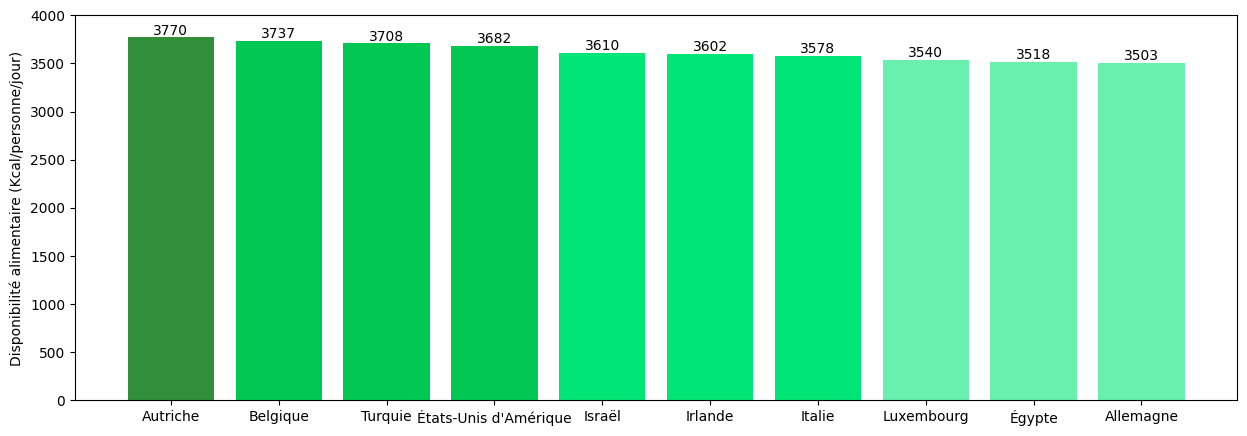

In [819]:

plt.figure(figsize=(15, 5))
couleurs=['#338e3c', '#00c853', '#00c853', '#00c853','#00e676','#00e676','#00e676','#69f0ae','#69f0ae','#69f0ae']

# diagramme
bars = plt.bar(top10_best['Zone'], top10_best['Disponibilité alimentaire (Kcal/personne/jour)'], color=couleurs)

# boucle pour afficher les valeurs dans les barres
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')

plt.ylabel('Disponibilité alimentaire (Kcal/personne/jour)')

plt.ylim(0,4000)
plt.show()


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [815]:
#création d'un dataframe avec uniquement la Thaïlande
df_thailande=df
df_thailande=pd.merge(dispoAlimentaire, df_thailande, on='Zone', how='inner')
df_thailande['Zone'] = df_thailande['Zone'].str.lower() #ne pas tenir compte de la casse
df_thailande = df_thailande.loc[df_thailande['Zone']=="thaïlande"]
df_thailande=df_thailande.copy()
df_thailande.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année pop,Population,Années ss nut,sous_nutrition
13570,thaïlande,Abats Comestible,animale,0.00,0.00,3.00,1.11,0.09,0.56,74000000.00,...,75000000.00,0.00,45000000.00,0.00,0.00,0.00,2017,69209810.00,2016-2018,6200000.00
13571,thaïlande,"Agrumes, Autres",vegetale,0.00,0.00,0.00,0.09,0.00,0.00,8000000.00,...,6000000.00,0.00,12000000.00,0.00,2000000.00,0.00,2017,69209810.00,2016-2018,6200000.00
13572,thaïlande,"Alcool, non Comestible",vegetale,0.00,358000000.00,0.00,0.00,0.00,0.00,358000000.00,...,0.00,0.00,447000000.00,0.00,0.00,0.00,2017,69209810.00,2016-2018,6200000.00
13573,thaïlande,Aliments pour enfants,vegetale,0.00,0.00,2.00,0.18,0.01,0.08,12000000.00,...,12000000.00,0.00,0.00,0.00,0.00,0.00,2017,69209810.00,2016-2018,6200000.00
13574,thaïlande,Ananas,vegetale,0.00,0.00,10.00,10.02,0.04,0.08,782000000.00,...,671000000.00,110000000.00,2209000000.00,0.00,0.00,13000000.00,2017,69209810.00,2016-2018,6200000.00


In [816]:
#Calcul de la sous nutrition en Thaïlande
df_thailande['proportion_sous_nutrition en %'] = (df_thailande['sous_nutrition'] / df_thailande['Population'])*100
i=[0,18,19,20,21,22]
ss_nutrition_thai = df_thailande.iloc[:,i]
ss_nutrition_thai.head(1)

,Zone,Année pop,Population,Années ss nut,sous_nutrition,proportion_sous_nutrition en %
13570,thaïlande,2017,69209810.00,2016-2018,6200000.00,8.96


In [817]:
# On calcule la proportion exportée en fonction de la proportion
export_manioc = df_thailande.loc[df_thailande['Produit']=="Manioc"].copy()#créé une copie explicite du dataframe utilisé.


export_manioc['proportion_exportée en %'] = (export_manioc['Exportations - Quantité']/export_manioc['Production']  )*100
export_manioc[['Zone','Production','proportion_exportée en %']].head(1)


,Zone,Production,proportion_exportée en %
13620,thaïlande,30228000000.00,83.41
